In [6]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import numpy as np
from CDK_pywrapper import FPType

from rdkit.Chem import Draw
from rdkit import Chem
from itertools import combinations

In [7]:
import sys
sys.path.append('../programming_scripts/')

from MS2LDA_core import run_lda
from MS2LDA_core import predict_with_lda
from SMART_annotation import annotate_motifs

In [8]:
spectra_path = "/Users/rosinatorres/Documents/PhD/Project/Data/PDE5_standards_annotated_pos_unique.mgf"

In [9]:
lda_model, corpus, id2word = run_lda(spectra_path=spectra_path, num_motifs=6)

In [10]:
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.202312  0.073643       1        1  25.032581
0      0.012351  0.266926       2        1  23.553329
3      0.241739 -0.072163       3        1  19.828198
4      0.028024 -0.176397       4        1  17.520928
5     -0.247841 -0.118908       5        1  11.313876
2      0.168038  0.026898       6        1   2.751088, topic_info=         Term        Freq       Total Category  logprob  loglift
474    169.1+  173.000000  173.000000  Default  30.0000  30.0000
159     185.1   57.000000   57.000000  Default  29.0000  29.0000
137   125.01+   57.000000   57.000000  Default  28.0000  28.0000
858    479.37  105.000000  105.000000  Default  27.0000  27.0000
862   532.26+  105.000000  105.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1020   411.63    2.324399   28.272979   Topic6  -5.1145   1.0947
1     115.05+    3.376838  232.563240   Topic6  -4.7410  -0.6390
60      78.03    2.257501   95.686867   Topic6  -5.1437  -0.1536
33     95.05+    2.011940   45.128281   Topic6  -5.2589   0.4828
981   299.01+    1.946978   27.565795   Topic6  -5.2917   0.9429

[306 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
260       1  0.327053  100.09
260       4  0.568040  100.09
260       5  0.103280  100.09
261       1  0.672386  100.1+
261       2  0.026895  100.1+
...     ...       ...     ...
392       1  0.121691  99.09+
392       2  0.096729  99.09+
392       3  0.408757  99.09+
392       4  0.361953  99.09+
392       5  0.009361  99.09+

[397 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 5, 6, 3])

In [12]:
smiles_per_motifs, predicted_motifs, predicted_motifs_distribution, spectra_per_motifs = predict_with_lda(lda_model, spectra_path, id2word)

ValueError: not enough values to unpack (expected 4, got 2)

In [7]:
from MS2LDA_vis import extract_topics
from MS2LDA_vis import convert_str_topic
from MS2LDA_vis import extract_peaks
from MS2LDA_vis import check_peak_intensity
from MS2LDA_vis import plot_spectra_with_motif

#from MS2LDA_vis import match_frag4motif
import matplotlib.pyplot as plt
extract_topics=extract_topics(lda_model)


In [8]:
#Choose number of the topic to extract for visualisation in bar plots
extract_topic=convert_str_topic(extract_topics[0])################### Put the topic you want here
print(extract_topic)

[150.03, 115.05, 483.27, 214.06, 221.11, 225.05, 144.08, 429.57, 135.04, 204.08]


In [9]:
#Here we need to extract the peaks and intensities from the list of objects spectra
ext_peaks,ext_int=extract_peaks(spectra_per_motifs[0])

In [10]:
#This finds all the motifs that are in the spectra, pairing motif with spectra, doing it for the length of the motif that was assign to
output_motif_spectra=[]
for i in range(0,len(spectra_per_motifs[0])):
    x,y=check_peak_intensity(ext_peaks[i], ext_int[i], extract_topic)
    output_motif_spectra.append((x, y))

for x,y in output_motif_spectra:
    print(x,y)

[115.05, 225.05] [0.26, 1.0]
[115.05] [1.0]
[115.05, 135.04, 204.08] [0.03, 1.0, 0.8]
[115.05, 144.08] [0.09, 1.0]
[483.27] [1.0]


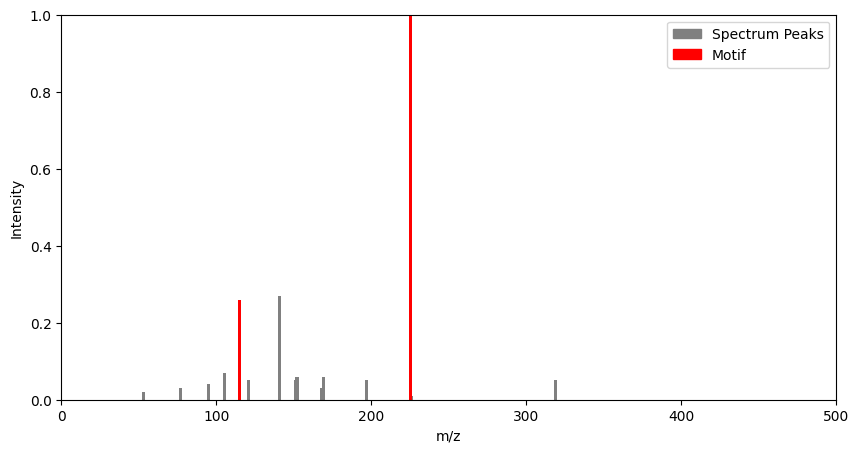

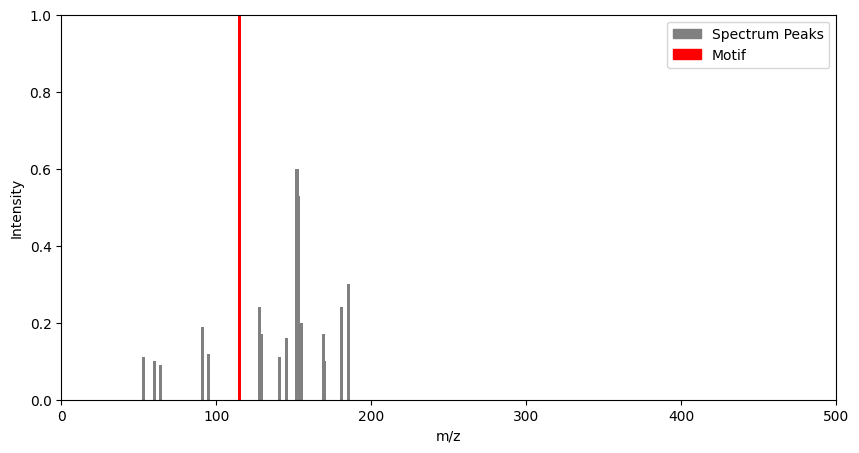

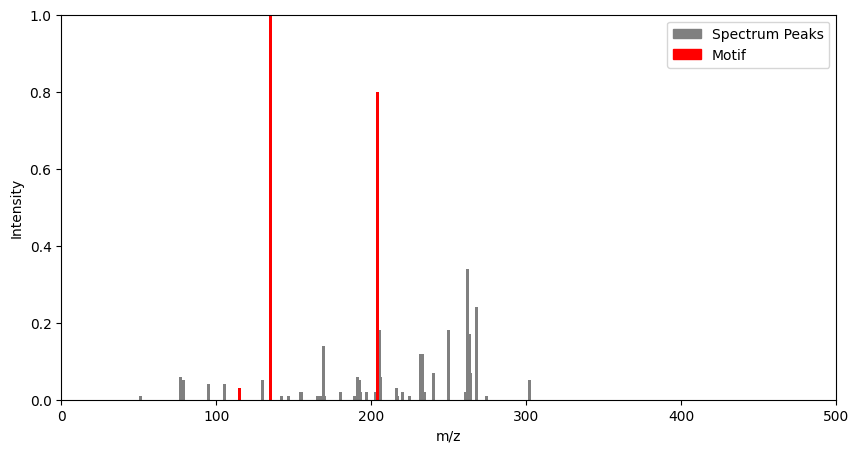

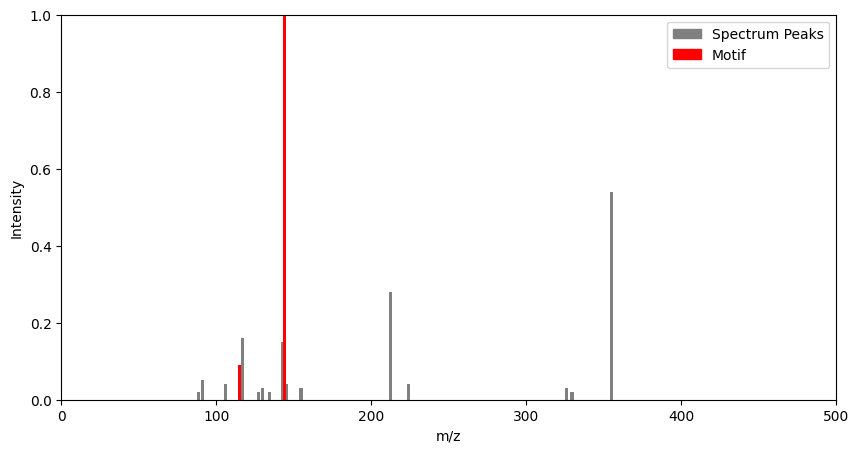

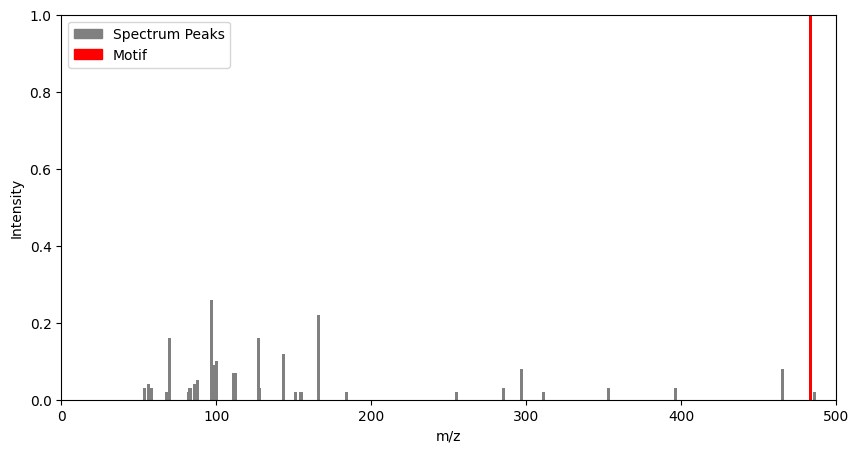

In [11]:
#We plot the motif in the spectras assigned to the topic
plot_spectra_with_motif(ext_peaks,ext_int, output_motif_spectra)

---

### Annotation

In [12]:
fps_motifs, smarts_motifs, motifs_similarities = annotate_motifs(smiles_per_motifs, fp_type=FPType.PubchemFP)

In [13]:
list(zip(list(range(1000)), motifs_similarities))

[(0, 0.48214285714285715),
 (1, 0.46956521739130436),
 (2, 0.6785714285714286),
 (3, 0.3476190476190476),
 (4, 0.13829787234042554),
 (5, 0.358695652173913),
 (6, 0.34545454545454546),
 (7, 0.6930232558139535),
 (8, 0.1393939393939394),
 (9, 0.5604395604395604),
 (10, 0.2968036529680365),
 (11, 0.2413793103448276),
 (12, 0.2864321608040201),
 (13, 0.17647058823529413),
 (14, 0.11557788944723618)]

In [14]:
#list(zip(list(range(1000)),list(combinations(range(66),2))))

In [15]:
n = 0
for motif_number, fps_motif in enumerate(fps_motifs):
    print(motif_number, len(smiles_per_motifs[motif_number]), np.sum(fps_motif))
    n += len(smiles_per_motifs[motif_number])
n

0 5 84.0
1 5 165.0
2 1 85.0
3 4 57.0
4 4 199.0
5 4 23.0


23

### Known Dataset

In [16]:
motif_number = 4

In [17]:
len(smarts_motifs[motif_number])

0

In [18]:
smarts_motifs[motif_number]

[]

In [19]:
len(smiles_per_motifs[motif_number])

4

In [20]:
smiles_per_motifs[motif_number]

['CCCC1=NN(C2=C1NC(=NC2=S)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)C)OCC)C',
 'CCCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)CCO)OCC)C',
 'CCCC1=CN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)CCO)OCCC)CC',
 'CCCC1=NN(C2=C1NC(=NC2=S)C3=C(C=CC(=C3)S(=O)(=O)N4CCN(CC4)CCO)OCC)C']

In [21]:
predicted_motifs_distribution[motif_number]

[[(4, 0.9987564)],
 [(4, 0.99810517)],
 [(4, 0.99910384)],
 [(3, 0.1651421), (4, 0.8339558)]]

In [22]:
mol_per_motif = [Chem.MolFromSmiles(smiles) for smiles in smiles_per_motifs[motif_number]]

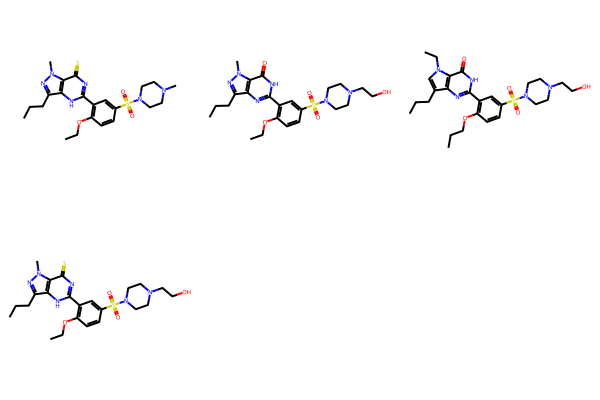

In [23]:
Draw.MolsToGridImage(mol_per_motif)

In [24]:
#mol_smarts_per_motif = [Chem.MolFromSmarts(smarts) for smarts in smarts_motifs[motif_number]]

In [25]:
#Draw.MolsToGridImage(mol_smarts_per_motif[10:])

---

### Unknown Dataset

In [26]:
#spectra_path_diffDB = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-NIH-SMALLMOLECULEPHARMACOLOGICALLYACTIVE.mgf"
spectra_path_diffDB = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-SCIEX-LIBRARY.mgf"

In [27]:
smiles_per_motifs_diffDB, predicted_motifs_diffDB = predict_with_lda(lda_model, spectra_path_diffDB, id2word)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dietr004\\Documents\\PhD\\computational mass spectrometry\\Spec2Struc\\Project_SubformulaAnnotation\\raw_data\\_RAWdata1\\GNPS-SCIEX-LIBRARY.mgf'

In [ ]:
annotated_motifs_diffDB = []
purities_maccs_diffDB = []
for smiles_per_motif in smiles_per_motifs_diffDB:
    annotated_motif, purity_maccs = annotate_motifs(smiles_per_motif)
    annotated_motifs_diffDB.append(annotated_motif)
    purities_maccs_diffDB.append(purity_maccs)

In [ ]:
for motif_number, purity_maccs in enumerate(purities_maccs_diffDB):
    purity_maccs_nan = purity_maccs.copy()
    purity_maccs_nan[purity_maccs_nan == 0] = np.nan
    print(motif_number, len(smiles_per_motifs_diffDB[motif_number]),len(annotated_motifs_diffDB[motif_number]), np.nanmean(purity_maccs_nan))

In [ ]:
motif_number = 22

In [ ]:
len(annotated_motifs_diffDB[motif_number])

In [ ]:
annotated_motifs_diffDB[motif_number]

In [ ]:
smiles_per_motifs_diffDB[motif_number]

In [ ]:
mol_per_motif_diffDB = [Chem.MolFromSmiles(smiles) for smiles in smiles_per_motifs_diffDB[motif_number]]

In [ ]:
Draw.MolsToGridImage(mol_per_motif_diffDB)

----

In [ ]:
smarts_mol = [Chem.MolFromSmarts(smarts) for smarts in annotated_motifs_diffDB[motif_number]]

In [ ]:
Draw.MolsToGridImage(smarts_mol[:5], molsPerRow=5)

In [ ]:
Draw.MolsToGridImage(smarts_mol[9:], molsPerRow=5)